## Problem Statement

This data is about the amount spent on advertising through different channels like TV, Radio and Newspaper. The goal is to predict how the expense on each channel affects the sales and is there a way to optimise that sale?
and also predict the sale for future data


## Importing libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pylab
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae,r2_score

## Loading data set

In [3]:
df=pd.read_csv("C:\\Users\\ritik\\Downloads\\datasets-20221227T153602Z-001\\datasets\\data sets\\Advertising.csv")

## viewing the data 

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## Missing values

In [9]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [11]:
#pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [28]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [29]:
import missingno as msno

<AxesSubplot:>

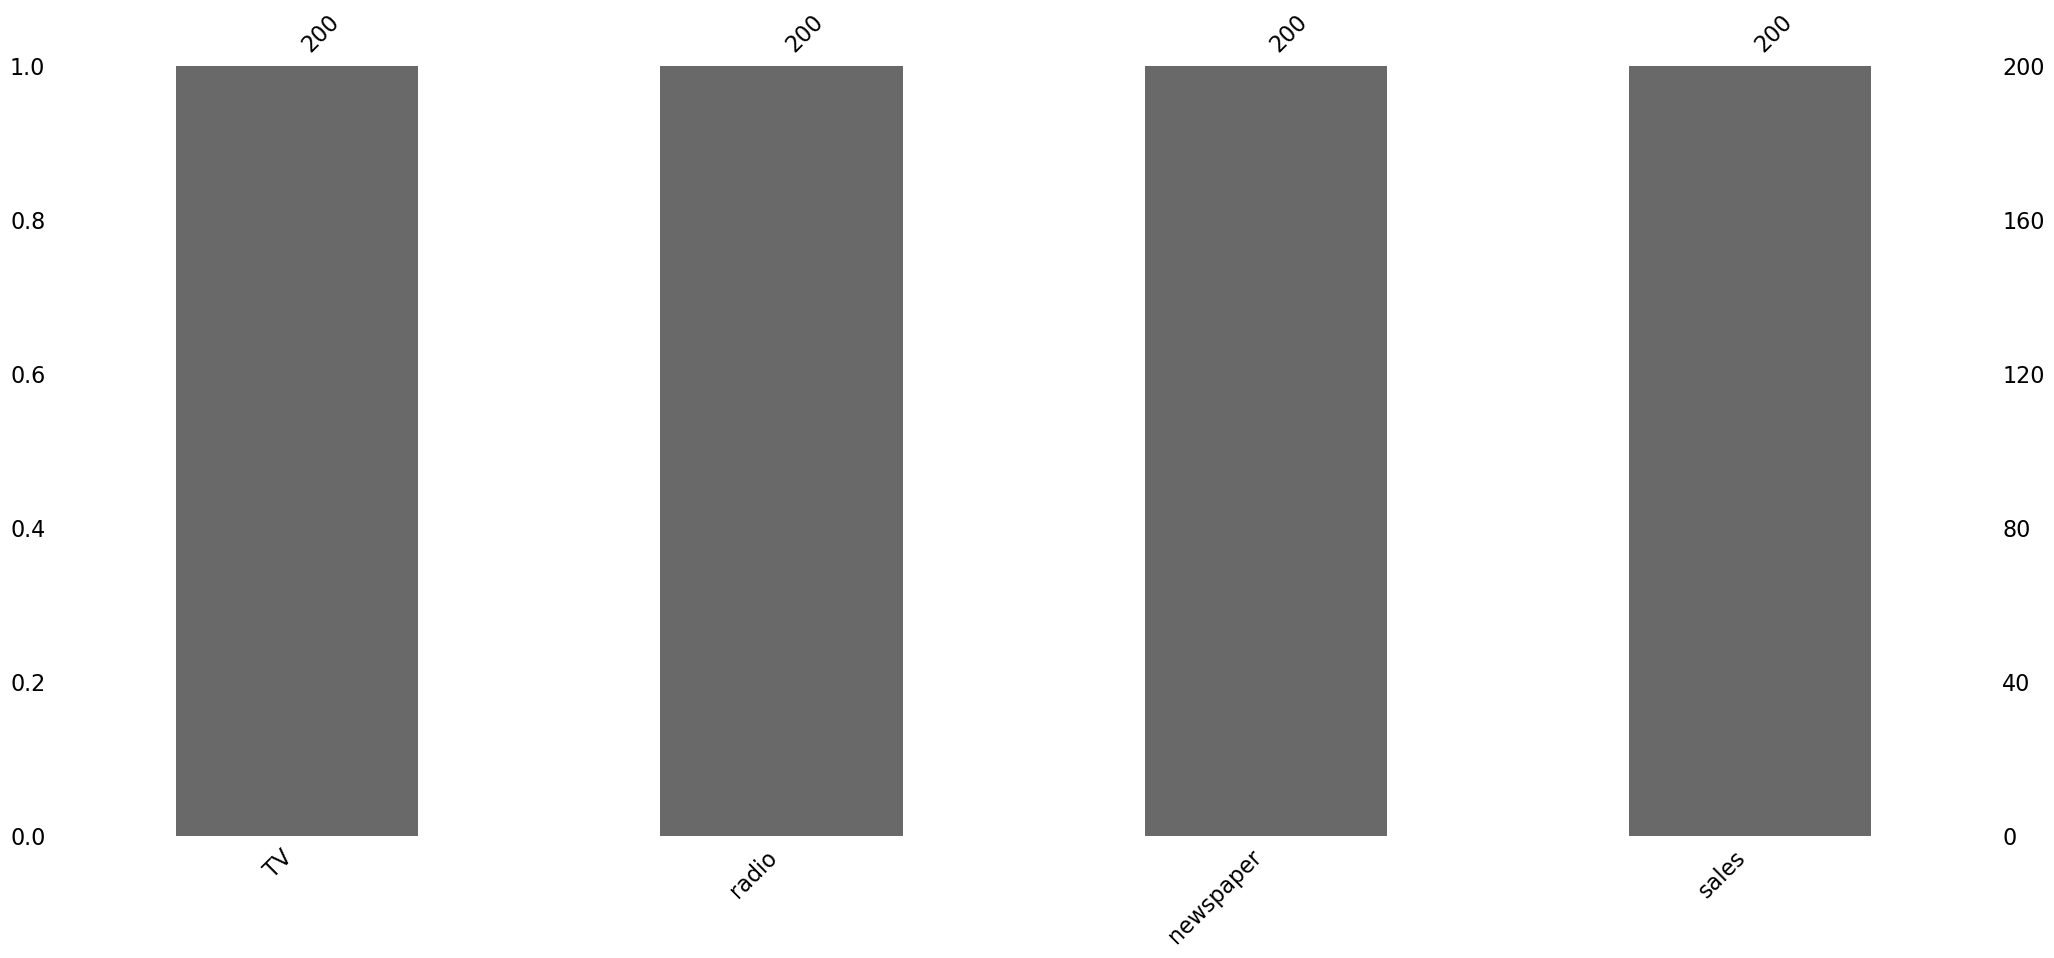

In [30]:
msno.bar(df)

In [31]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [32]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [33]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

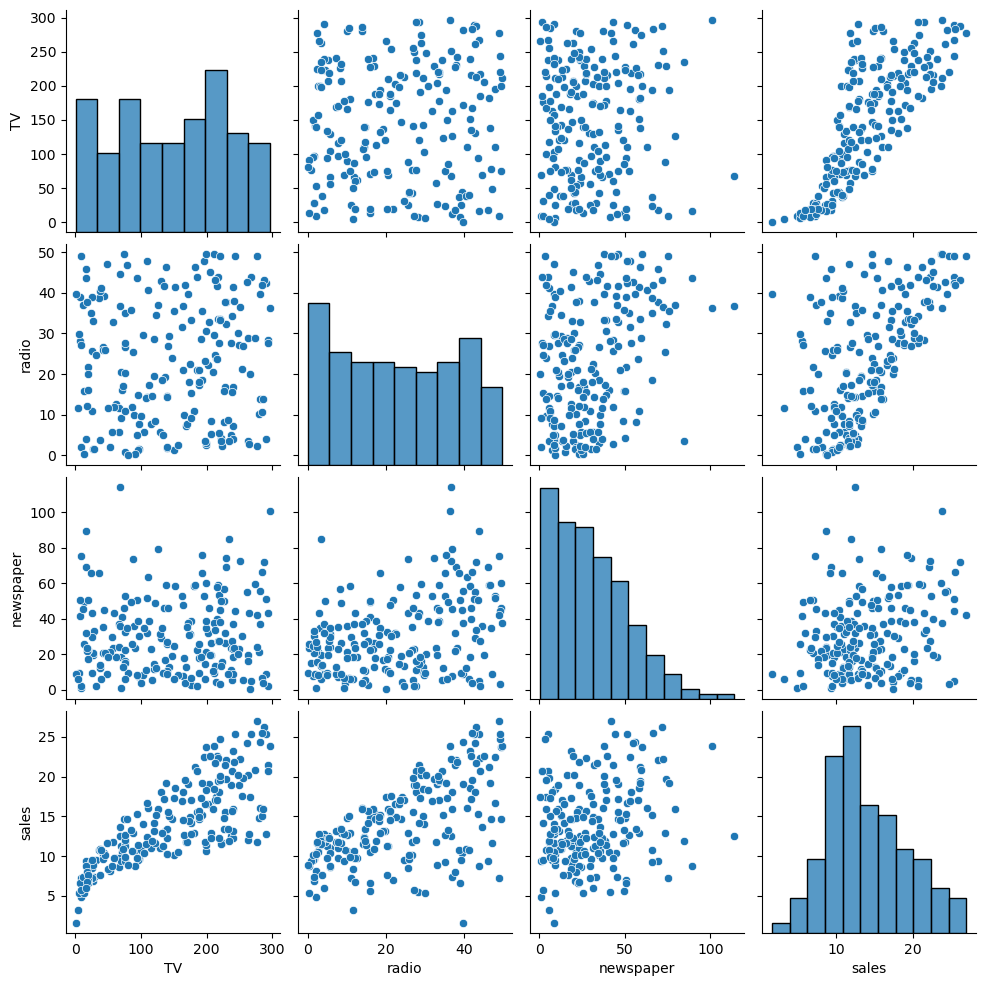

In [34]:
sns.pairplot(df)

from this output we can say there is sort of linear relation between tv and sale and there is not much linearity found in ratio with sale and there is no linear relation between 

C:\Users\ritik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ritik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ritik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

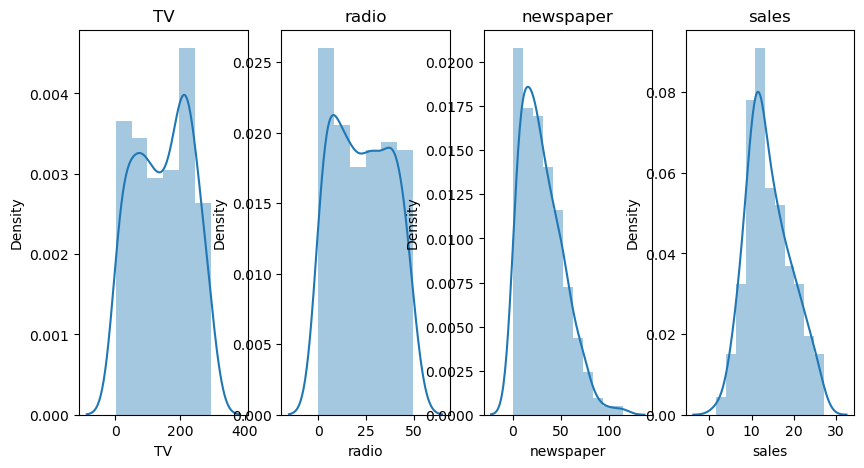

In [35]:
## distribution 
pos=1
plt.figure(figsize=(10,5))
for i in df.columns:
    plt.subplot(1,4,pos)
    sns.distplot(df[i])
    plt.title(i)
    pos=pos+1


C:\Users\ritik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ritik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ritik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ritik\anaconda3\lib\si

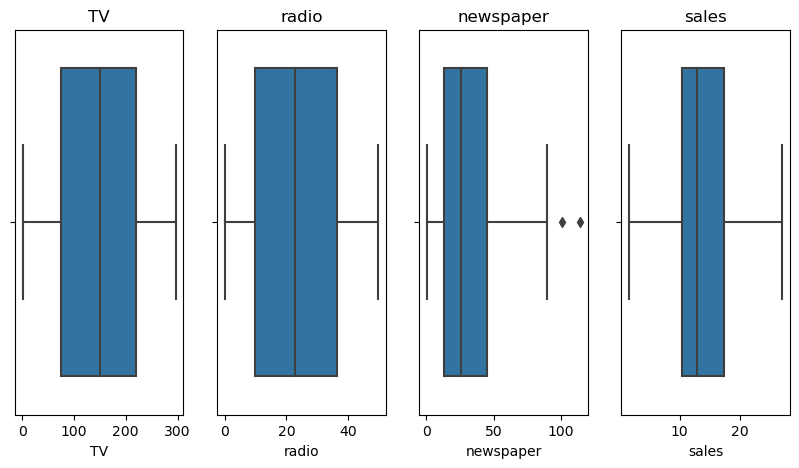

In [36]:
pos=1
plt.figure(figsize=(10,5))
for i in df.columns:
    plt.subplot(1,4,pos)
    sns.boxplot(df[i])
    plt.title(i)
    pos=pos+1


In [37]:
x=df[[]]

In [40]:
x=df.drop(columns=["sales"])
y=df["sales"] ## target

In [48]:
st=StandardScaler()
x_scaled=st.fit_transform(x)
x_scaled

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [49]:
vif = pd.DataFrame()  ##creating blank dataframe 
#vif
variables  = x_scaled
#variables.shape
vif["VIF"] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
#vif["VIF"]
vif["features"]=x.columns
#vif["features"]
vif


,VIF,features
0,1.004611,TV
1,1.144952,radio
2,1.145187,newspaper


Since there is no multicoolinearity

In [50]:
## Split the data into train and test

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=1)

In [55]:
print(x_train.shape)
y_train.shape

(160, 3)


(160,)

In [57]:
lr=LinearRegression()

## Train the Model

In [58]:
lr.fit(x_train,y_train)

LinearRegression()

In [60]:
lr.coef_

array([4.01161205, 2.64417846, 0.05618258])

In [61]:
lr.intercept_

14.02854796400448

## Evaluate the data

In [62]:
y_pred=lr.predict(x_test)

In [63]:
r2_score(y_test,y_predz)

0.8927605914615385